# Spotify Regression Problem 2023
### Project by : Kaleemulla Adil Rahman

## Objective

The objective of the challenge is to build a **machine learning model** that is able to predict the **popularity score** of a song. Popularity of a song is a continuous numerical value and this problem statement is a **regression problem**.

## Dataset

There are two files `CS98XRegressionTrain.csv` that contains the training dataset and `CS98XRegressionTest.csv` that contains the dataset for final testing.

## Dataset Description

The dataset is drawn from [this kaggle dataset](https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s.) with a few changes. The dataset is a collection of spotify songs with their **audio features** (tempo, energy, danceability etc.) The training dataset contains 15 columns that are described below:

- `Id` - an arbitrary unique track identifier
- `title` - track title
- `artist` - singer or band
- `top genre` - genre of the track
- `year` - year of release (or re-release)
- `bpm` - beats per minute (tempo)
- `nrgy` - energy: the higher the value the more energetic
- `dnce` - danceability: the higher the value, the easier it is to dance to this song
- `dB` - loudness (dB): the higher the value, the louder the song
- `live` - liveness: the higher the value, the more likely the song is a live recording
- `val` - valence: the higher the value, the more positive mood for the song
- `dur` - duration: the length of the song
- `acous` - acousticness: the higher the value the more acoustic the song is
- `spch` - speechiness: the higher the value the more spoken word the song contains
- `pop` - popularity: the higher the value the more popular the song is (and the target variable for this problem)

## Approach

The approach of our group towards solving this problem is by using various regression models like Catboost Regressor, Stochastic Gradient descent Regressor, Support Vector Regression, Decision Tree, Random Forest Regressor and Gradientboost Regressor so as to choose the regression model showcasing optimum efficiency. In order to progress towrads this ultimate output, we have performed various preliminary operations on the datasets which include cleaning the datasets and visualizing relationships between various features and target variable (i.e Popularity) using Exploratory Data Analysis. 

## Required python libraries

- [Numpy](https://numpy.org/) - for numerical operations
- [Pandas](https://pandas.pydata.org/) - for loading, querying and manipulating datasets
- [Matplotlib (pyplot)](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) - for visual analysis
- [Seaborn](https://seaborn.pydata.org/) - for visual analysis
- [Scikit-Learn](https://scikit-learn.org/stable/) - for machine learning
- [Catboost](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) - for CatBoost Regressor Model

In [2]:
!pip install catboost -q

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [3]:
#Import libraries

import numpy as np
import pandas as pd
import plotly.express as px
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
sns.set_style("whitegrid")

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

#Disable warning of sklearn & seaborn

import warnings
warnings.filterwarnings('ignore')

In [10]:
df_train=pd.read_csv(r"/kaggle/input/cs9856-spotify-regression-problem-2023/CS98XRegressionTrain.csv")
df_test=pd.read_csv(r"/kaggle/input/cs9856-spotify-regression-problem-2023/CS98XRegressionTest.csv")

### **Basic Data Analysis:** 

In order to explore the given dataset, it is important to review both, the training and the testing dataset prior to progressing towards Exploratory Data Analysis. To do that, first we will obtain the results using basic descriptive functions.(e.g df.head(), df.tail(), df.sample() etc) which give you the first few entries in the dataframe, last few entries of the dataframe, random sample of dataframe etc.

The above output implies that there are 435 rows and 15 columns in the Training Data while there are 114 rows and 14 columns in the Testing Data. It can also be seen that three of the total columns from both the datasets i.e Training as well as Testing Datatset, namely 'title', 'artist' and 'top genre' are in 'object' format (text format) while all other columns have integers as their inputs.

In [11]:
df_train.head(5)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [12]:
df_train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


The above table statistically describes the `DataFrame` and displays Mean, Standard Deviation, and Five-Number summary of each numerical feature

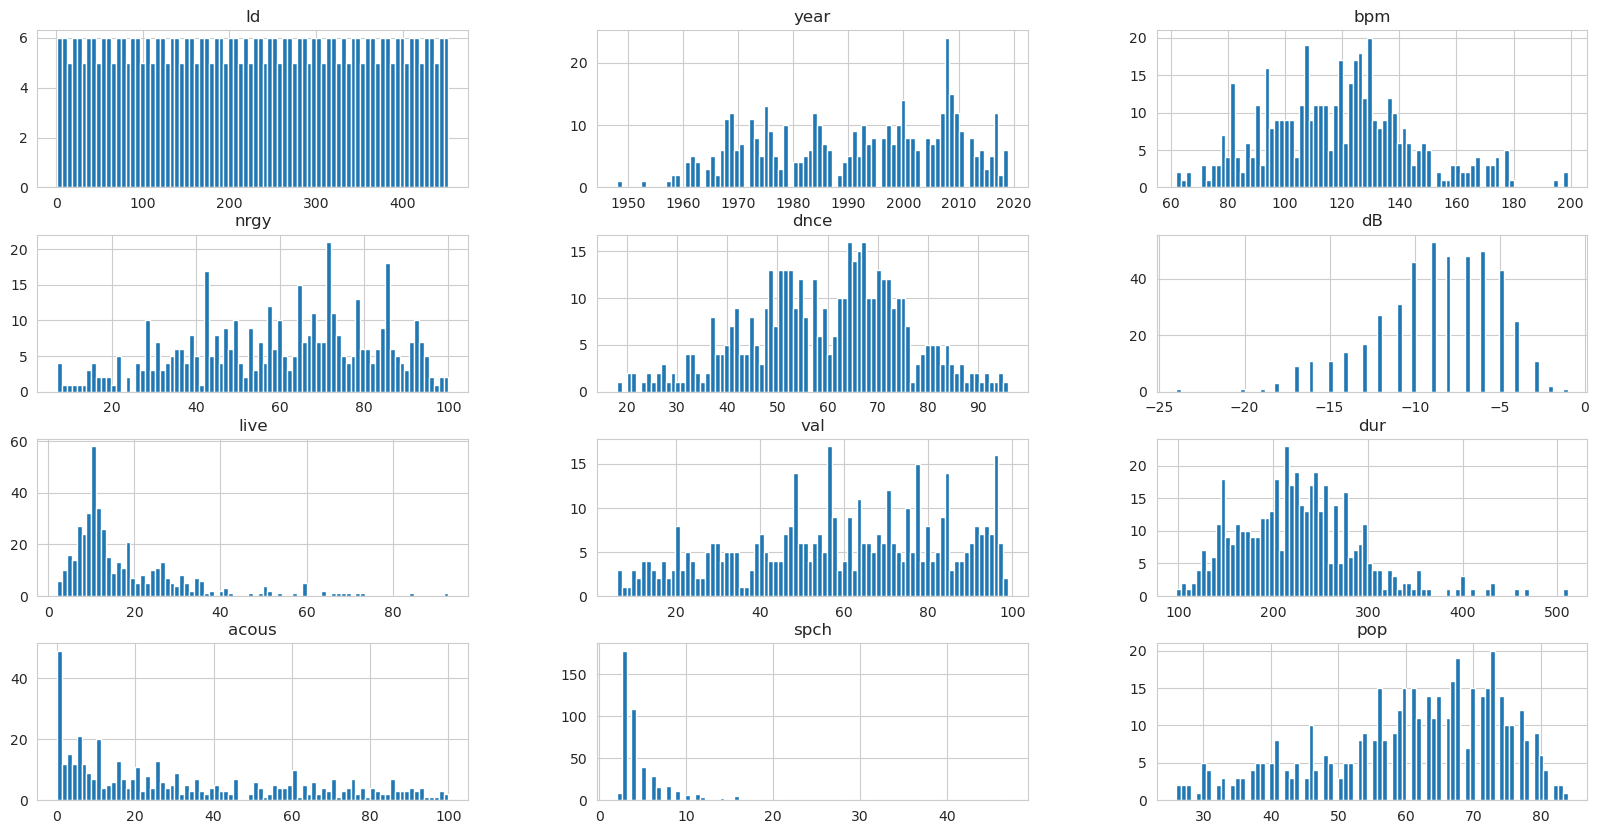

In [13]:
df_train.hist(bins=80, figsize=(20,10));

From the above output, we can clearly see the data distribution of all the features in the dataset. It can be implied that the data distribution of bpm (beats per minute), nrgy (energy), dnce (danceability), dB (loudness), live (liveness), dur (duration), acous (acousticness), spch (speechiness) and pop (popularity) are normally distributed with few of them being positively or negatively skewed and few being normally distributed.

### Correlation Matrix
A **heatmap** is a graphical representation of data that shows various values using a **color-coding scheme**. Although heatmaps can be used for many different types of analytics, they are most frequently used to display user behaviour on certain webpages or webpage layouts.

The remaining features can now be examined to see how they connect to one another, particularly to the **pop** column. Each value in a matrix is represented graphically as a different colour in a heatmap.

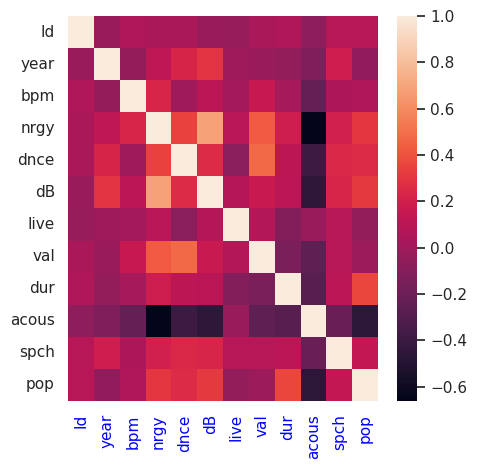

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(df_train.corr())
ax.tick_params(axis='x', colors='blue')

As seen above,
* The relationship between value and colour will most often take the form of a sequential colour ramp, where brighter colours represent greater values and darker colours represent lower values, or vice versa.
* On the other hand, light colours have a strong relationship whereas dark colours have a weak or nonexistent relationship.

### **The characteristics of POP that are most linearly connected**
As we can see below, The correlation matrix between all the features we're looking at and our y-variable is created by the code. The 'pop' has a significant relationship with 'dur' and 'dB,.

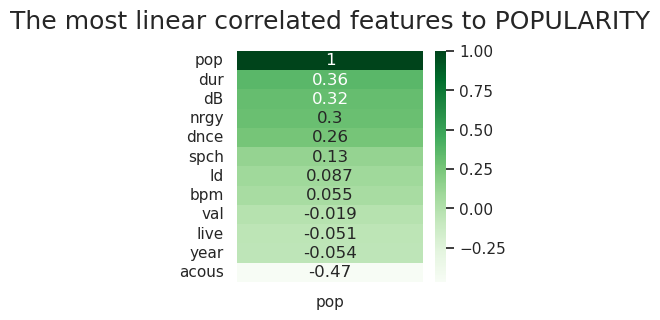

In [15]:
corr = df_train.corr()[['pop']].sort_values(by='pop', ascending=False)
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(corr, annot=True, cmap='Greens')
heatmap.set_title('The most linear correlated features to POPULARITY', fontdict={'fontsize':18}, pad=16);

### **Duration(dur)**

* The dur characteristic is significantly high as compared to other features at the desired level of popularity (corr = 0.36).
* This feature will be essential to predict the popularity of any given song or random song.  

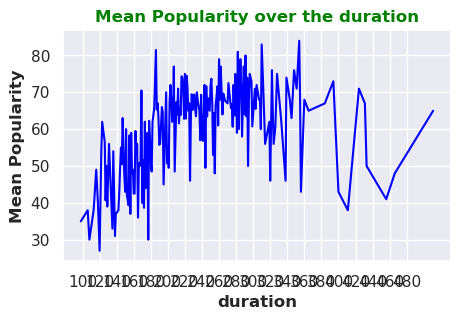

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
ax = df_train.groupby('dur')['pop'].mean().plot(color='blue')
ax.set_title('Mean Popularity over the duration', c='green', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('duration', weight='bold')
ax.set_xticks(range(100, 500, 20))
plt.show()

According to the aforementioned graph, we can see that listeners prefer songs with a duration between 200 and 360 seconds.

### **Loudness (dB)**

*Decibels represent how loud a track is overall (dB). In order to compare the relative loudness of tracks, loudness ratings are averaged over the entire track. The main acoustic characteristic that correlates psychologically with physical strength is loudness (amplitude). Typical values are between -60 and 0 db.*

* Choose the level of action and intensity; a louder track will feel faster and noisier.
* In comparison to 'dur' , it appears to be a second strong linear correlation of 0.32.
* Loudness appeared to be the 2nd greatest predictor based on the correlation heatmap after Duration(dur).

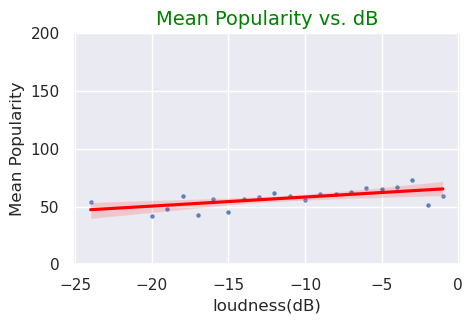

In [17]:
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line
    using given inputs'''
    data = data.groupby(x)[y].mean().to_frame().reset_index()
    fig, ax = plt.subplots(figsize=(5,3))
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'b', "s": 5}, line_kws={'color':'red'} )
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14, c='green')
    _ = plt.ylim(0, 200)
    plt.show()
regress_plot(x='dB', y='pop', data=df_train, xlab='loudness(dB)', ylab='Mean Popularity', titl='Mean Popularity vs. dB')

According to the **Mean Populrity vs.dB linear graph**, the popularity is increasing constantly as loudness(dB) is increasing. 

### **Working on Training and Testing data**

We will merge the 2 dataset we have i.e. train dataset & test dataset as we are going to use dummy functions for some of our categorical values.
If we perform this function on our 2 datasets seperately we would get results which are not consistant as due to the difference in shape of our 2 dataset.
To start our Merging dataset we would start by saving the IDs of both our dataset.

In [19]:
train_ID = df_train['Id']
test_ID = df_test['Id']

In [20]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]

# Selecting target feature
df_train_y = df_train['pop']
comb_data = pd.concat((df_train, df_test)).reset_index(drop=True)
comb_data.drop(['pop'], axis=1, inplace=True)
print("comb_data shape is : {}".format(comb_data.shape))

comb_data shape is : (567, 14)


We would remove the ID column from our dataset as it has no relevance to our model.
We would remove the title column from the dataset as it has no relevance with pop as stated above.
Rest all the feature we would try and keep it in our model to have better prediction of our results.

### **Replacing the Null Values**

We would try and replace the null values with 'none' in the top genre column. The other two methods of replacing the null value were-
- Droping the null value column but we wouldn't do it as Genre is a important feature to predict a popularity of a song and the other reason is that we already have very less number of features for our model. We can't drop more features as it may lead to bad estimate for our results.
- Replacing the null values with the most popular and recurring genre but this may result in bias result prediction for our model.

So according to me the best possible approach to deal with null value here is to with the 'none' approach. This would create a new genre for our dataset.

In [21]:
comb_data.isnull().sum()

Id            0
title         0
artist        0
top genre    16
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
dtype: int64

In [24]:
comb_data['top genre'] = comb_data['top genre'].fillna("none")


Now our next challenge is transforming the year column. 
If we feed the year column in our model as it is it may give us the results that is not true, i.e. it may find a relationship that doesn't exist.
For e.g our model may predict that a song with 2010 label does not have a feature related to a song with 2005 label.

Therefore we would treat this year column as a categorical feature as it has similaries to the song name that we had treated above.

In [25]:
comb_data['year'] = comb_data['year'].astype(str)

In [26]:
#using get dummies feature for top genre for our data
comb_data = pd.get_dummies(comb_data)
print(comb_data.shape)

df_train_X = comb_data[:n_train]
df_test = comb_data[n_train:]

(567, 1146)


In [27]:
comb_data.head(5)

,Id,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,1,107,31,45,-8,13,28,150,75,3,...,0,0,0,0,0,0,0,0,0,0
1,2,114,44,53,-8,13,47,139,49,3,...,0,1,0,0,0,0,0,0,0,0
2,3,105,36,63,-9,13,67,245,11,3,...,0,0,0,0,0,0,0,0,0,0
3,4,170,28,47,-16,13,33,232,25,3,...,0,0,0,0,0,0,0,0,0,0
4,5,121,47,56,-8,15,40,193,45,3,...,0,0,0,0,0,0,0,0,0,0


As we can see earlier we had only 9 features but after using dummies feature our columns got increased as the 'year', 'artist','top genre' columns were dropped and dummies were created in place of them. There are 570+ dummies variables and rest all are our quantitative features.

### **Preparing training and validation data** 

We have used K-Fold cross validation feature from sklearn to split our dataset and shuffle our dataset for better spliting of our data. K-Fold cross validation is used to tune models which includes splitting the data into training and testing datasets and choosing the set with the optimal output.

In [28]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, df_train_X, df_train_y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)
# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

### **Performing Regression**

Now we will use different models to compare the results for our dataset. We need to do scaling for some of the models so that there is no difference in the features for the models and the final results are better estimated. For scaling we will be using Standard Scaler Feature from Sklearn.

* **Cat Boost Regressor** : CatBoost builds upon the theory of decision trees and gradient boosting. The main idea of boosting is to sequentially combine many weak models and thus through greedy search create a strong competitive predictive model.
* **Sytochastic Gradient Descent** : It is an optimization algorithm that is used in Machine Learning which uses model parameters to predict the output that best fit the model.
* **Support Vector Regression** : It is a Machine learning algorithm which uses the same principle as the SVMs (Single Vector Model) and is primarily used for regression and classification. It is used to predict discrete values. 
* **Decision Tree Regressor** : A decision tree regressor observes the data of the features thereby using it to predict the output in a continuous manner.
* **Random Forest Regressor** : It is basically an estimator that fits classifying decision trees on smaller samples of the dataset thereby improving the overall efficiency of the model by reducing the errors and controlling over-fitting.
* **Gradient Boost Regressor** : This estimator builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. A regression tree is fitted on the negative gradient of the provided loss function at each level.

In [29]:
RMSE_mean = []
RMSE_std = []

Regressors = ["Cat_Boost_Reg",'Stoch_Grad_Des','SVR',
                   'Dec_Tree_Reg','Random_Forest_Reg', 
                   'Grad_Boost_Reg']

# Setting the scaler to be used in pipeline
scaler=StandardScaler()

# Cat Boost Regressor
catbr = CatBoostRegressor(silent=True)
score_catbr = cv_rmse(catbr)
RMSE_mean.append(score_catbr.mean())
RMSE_std.append(score_catbr.std())

# Stochastic Gradient Descent
sgd_reg = make_pipeline(scaler,SGDRegressor())
score_sgd_reg = cv_rmse(sgd_reg)
RMSE_mean.append(score_sgd_reg.mean())
RMSE_std.append(score_sgd_reg.std())

# Support Vector Regression
svr = make_pipeline(scaler,SVR(C=100, epsilon=0.1))
score_svr = cv_rmse(svr)
RMSE_mean.append(score_svr.mean())
RMSE_std.append(score_svr.std())

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
RMSE_mean.append(score_dtr.mean())
RMSE_std.append(score_dtr.std())

# Random Forest Regressor
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
RMSE_mean.append(score_rfr.mean())
RMSE_std.append(score_rfr.std())

# Gradient Boost Regressor
gbr = make_pipeline(scaler,GradientBoostingRegressor())
score_gbr = cv_rmse(gbr)
RMSE_mean.append(score_gbr.mean())
RMSE_std.append(score_gbr.std())

**Mean Squared Error**

A common error metric for regression issues is mean squared error, or MSE for short.
It is also a crucial loss function for algorithms that are fitted or optimised when a regression problem is framed 
in terms of least squares. Minimizing the mean squared error between the forecasts and the expected values 
is what is meant by "least squares" in this context.

**Root Mean Squared Error**
An addition to the mean squared error is the Root Mean Squared Error, or RMSE.
The square root of the error is determined, which is significant since it means that the units of the RMSE and the goal value that is being forecasted are the same.
For instance, the RMSE error score will contain the unit "dollars" and not "squared dollars" like the MSE if your target variable has the units "dollars."
As a result, it would be typical to train a regression predictive model using MSE loss and then evaluate and report its performance using RMSE.


In [30]:
Model, score_mean, score_std = np.array(Regressors), np.array(RMSE_mean), np.array(RMSE_std)
dataset = pd.DataFrame({'Regressors': Regressors, 'RMSE_mean': RMSE_mean, 'RMSE_std': RMSE_std}, columns=['Regressors','RMSE_mean', 'RMSE_std'])

### Performance of different models
The Mean squared error of Cat boost regression is very low i.e **10.288591** as compared to other while the Decision Tree Regression have very high mean squared error i.e **15.010148**. 

<AxesSubplot:xlabel='Regressors'>

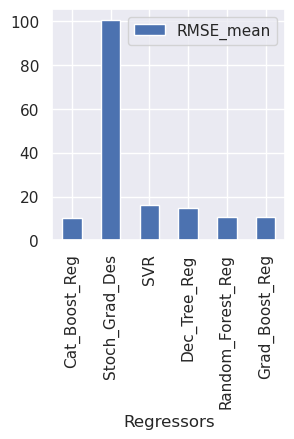

In [31]:
dataset.plot(kind='bar', x='Regressors', y='RMSE_mean', figsize=(3,3))

**Observation**

In the above graph, we have compared all 6 Regression model on the basis of their performance, and we found that , the performance of decision tree regression and SVR are worst as compared to other model while the performance of Cat boost regression and Gradient boost regression are best.

##CatBoost has the best performance and is our final regression model##


In [32]:
#Performance on the training data
X_train,X_val,y_train,y_val = train_test_split(df_train_X, df_train_y,test_size=0.1,random_state=52)
# Cat Boost Regressor
cat = CatBoostRegressor()
CatBR_model = cat.fit(X_train,y_train, eval_set = (X_val,y_val),plot=True,verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
cat_pred = CatBR_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
print('RMSE=',cat_score)

RMSE= 9.934774977159984


The model's initial run produces an RMSE of 9.695. We examine the model's characteristics and make an effort to modify its hyperparameters in order to increase this performance.

In [34]:
#Examine the top features of the model
top_feature = CatBR_model.get_feature_importance(prettified=True)
top_feature

,Feature Id,Importances
0,dur,28.910082
1,acous,10.928216
2,dB,7.277597
3,nrgy,6.924980
4,bpm,6.555154
...,...,...
1141,year_1995,0.000000
1142,year_2000,0.000000
1143,year_2003,0.000000
1144,year_2014,0.000000


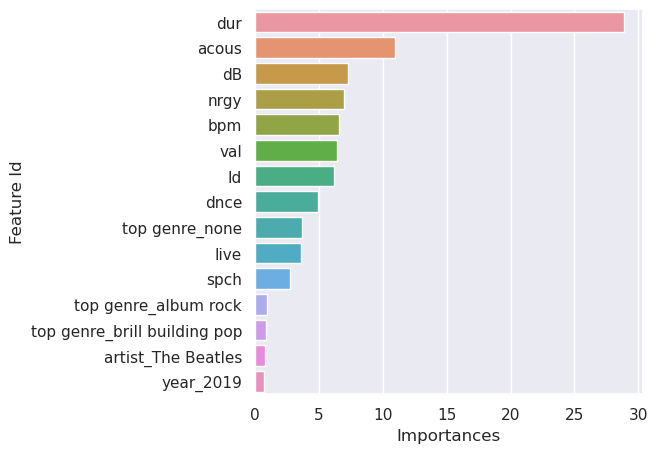

In [35]:
plt.figure(figsize = (5,5), dpi = 100)
sns.barplot(x=top_feature['Importances'][:15],y=top_feature['Feature Id'][:15], orient = 'h')
plt.show()

From the above graph we can see that the #Duration and #Acousticness features are a strong predictors of a song popularity.

In [ ]:
# Catboost default paramters
CatBR_model.get_all_params()

### Optimization of Parameters:

We peform a Random Search of the model to find the best combination of our parameters to better train the model and improve the performance of the model.

From above we can see current important parameters as:
'depth': 6
'iterations': 1000
'l2_leaf_reg': 3
'learning_rate': 0.044


We repeat the optimization with different values of the model to get close to the values above and include values closer to the result in the next cell.

In [ ]:

df_model = {'depth': [2,4,6,8],'iterations': [400,1000,5000],'l2_leaf_reg': [1,2,3,4,5,6],'learning_rate': [0.5,0.0355,0.044,0.009]}
best_model = CatBoostRegressor(silent=True)
randomized_search_result = best_model.randomized_search(df_model,X = X_train,y= y_train, verbose=False)

To perform the final prediction model, we use the outcomes of the randomised search.

In [38]:
# Final Cat-Boost Regressor
params = {'iterations': 400,'learning_rate': 0.0355,'depth': 4,'l2_leaf_reg': 2,'eval_metric':'RMSE','silent': True,'random_seed': 40}
         
Cat_R = CatBoostRegressor(**params)
Cat_Model = Cat_R.fit(X_train,y_train,eval_set = (X_val,y_val))
CatR_pred = Cat_Model.predict(X_val)
CatR_score = rmse(y_val, CatR_pred)

In [39]:
print('Final RMSE=',CatR_score)

Final RMSE= 9.372608727156752


Our final RMSE score for the model on training dataset is 9.3036. When submitted to Kaggle, we ranked `51` out of `81` teams with a final score of `7.71333`

In [40]:
# Test CSV Submission
test_pred = Cat_R.predict(df_test)
submission = pd.DataFrame(test_ID, columns = ['Id'])
submission['pop'] = test_pred
submission.to_csv('/kaggle/working/output.csv', index=False)